## PA 1 Building a Cancer Classifier

Mario Moreno

In [14]:
import pandas as pd
import seaborn as sn
import classifier_script as cs
import ml_pipeline as mp
import importlib
importlib.reload(cs)
importlib.reload(mp)
import warnings; warnings.simplefilter('ignore')

In [31]:
protein, alls = cs.read_csv(['Data/nt.coding.csv', 'Data/nt.all.csv'], 1000)

## Part 1: Normal and Tumor Match Pair Analysis

#### a) 	Using SciKit Learn build a machine learning classifier that takes RNAseq profiles from matched normal tumor pairs and classifies the sample as Normal or Tumor. Compare the nt.coding.csv vs the nt.all.csv.

In [6]:
models = ['RF','DT', 'LR', 'NB']

First, I'll run the four models above (Random Forests, Decision Trees, Logistic Regression, and Naive Bayed) on the protein encodings data. 

In [7]:
protein_report = cs.classical_ml(protein, 'Type', 5, 'small', models, 'models', False, 100, False)

RF
DT
LR
NB
RF
DT
LR
NB
RF
DT
LR
NB
RF
DT
LR
NB
RF
DT
LR
NB


Next, I'll run the same four models on all the encodings data provided. 

In [8]:
all_report = cs.classical_ml(alls, 'Type', 5, 'small', models, 'models', False, 100, False)

RF
DT
LR
NB
RF
DT
LR
NB
RF
DT
LR
NB
RF
DT
LR
NB
RF
DT
LR
NB


For both datasets, my machine learning script runs four classification models: Random Forests, Decision Trees, Logistic Regression, and Naive Bayes across a number of different parameters using a magic loop (in total, it runs 50 different iterations of the four models). Prior to running the magic loop, my script splits the dataset into feature and label dataframes, determines whether it needs to select features and how many(for part c), and then does the cross validation using the sklearn K_Fold method. It passes the train, test pairs from k_fold into the magic loop, collects the results, and outputs them in a dataframe that includes accuracy, auc-roc, f1 score at a 5% threshold, and the confusion matrix of all model iterations. 

#### b.	Using model selection methods of your choice determine which classical ML method performs best on the NT classification problem.

The script run above returned dataframes of results that include accuracy, auc, f1 scores, and confusion matrices for each model and corresponding parameters. In looking at these, I'll be able to note which model and accompanying parameter performed best. 

Below are the results of the datasets including all encodings, with the max values for each metric highlighted. 

In [11]:
all_report.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.970238,0.992946,0.970068,[[1234 38] [ 37 1211]]
1,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.969841,0.992674,0.969424,[[1237 35] [ 41 1207]]
2,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.95119,0.98839,0.950713,[[1207 65] [ 58 1190]]
3,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.961905,0.989579,0.961297,[[1226 46] [ 50 1198]]
4,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.970635,0.993679,0.97032,[[1233 39] [ 35 1213]]
5,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.97381,0.993624,0.973549,[[1238 34] [ 32 1216]]
6,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.965873,0.992401,0.965484,[[1228 44] [ 42 1206]]
7,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.965476,0.991935,0.965181,[[1226 46] [ 41 1207]]
8,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 2}",0.82381,0.823221,0.808545,[[1137 135] [ 309 939]]
9,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 5}",0.82381,0.823221,0.808545,[[1137 135] [ 309 939]]


From the dataframe above, which shows the results for all the models and associated parameters that were run on the all encodings data, it's clear that a Logistic Regression model with 0.1 inverse regularization and l1 penalty outperforms all other models (LR{'C':0.1, 'penalty':'l1}). This model returns the highest mean accuracy and mean f1 score at a 5% threshold than all other models, although it doesn't return the highest auc_mean results. That said, it does have the best confusion matrix out of all the models, which is show below:

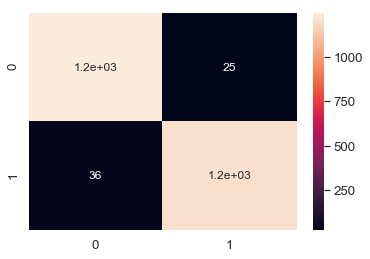

In [21]:
df_cm = pd.DataFrame(all_report.loc[46]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

In looking at the output for the models run on the protein encodings, the script returns the following results

In [22]:
protein_report.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.969048,0.993266,0.968406,[[1240 32] [ 46 1202]]
1,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.96746,0.993333,0.966818,[[1239 33] [ 49 1199]]
2,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.961905,0.99097,0.961212,[[1230 42] [ 54 1194]]
3,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.959127,0.99073,0.958436,[[1224 48] [ 55 1193]]
4,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.969841,0.99348,0.969537,[[1234 38] [ 38 1210]]
5,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.973016,0.993528,0.972712,[[1238 34] [ 34 1214]]
6,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.971032,0.993282,0.970842,[[1230 42] [ 31 1217]]
7,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.969444,0.992873,0.969206,[[1232 40] [ 37 1211]]
8,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 2}",0.82381,0.823221,0.808545,[[1137 135] [ 309 939]]
9,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 5}",0.82381,0.823221,0.808545,[[1137 135] [ 309 939]]


Much like the models run on the all encodings data, the models run on protein encodings also find that a Logistic Regression model tuned with inverse regularization of 0.1 and an l1 penalty results in the highest accuracy mean and f1 score mean at the 5% threshold. Similarly, this model also return the best confusion matrix, which can be seen below.

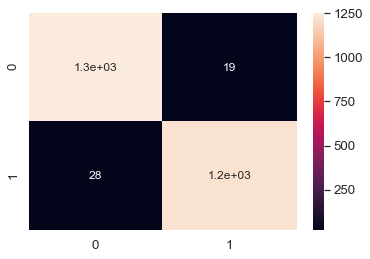

In [23]:
df_cm = pd.DataFrame(protein_report.loc[46]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

It's evident that a logistic regression model tuned with inverse regularization at 0.1 and an l1 penalty is the best classification model for the protein and all encodings dataset. 

#### c.	Using feature selection methods of your choice determine a < 100 gene signature that can be used to classify Normal vs Tumor.

In [32]:
feat_protein_report = cs.classical_ml(protein, 'Type', 5, 'small', models, 'models', True, 99, False)

features selected: Index(['ENSG00000007306.13', 'ENSG00000034510.5', 'ENSG00000042832.10',
       'ENSG00000091138.11', 'ENSG00000091583.9', 'ENSG00000096088.15',
       'ENSG00000101335.8', 'ENSG00000104879.4', 'ENSG00000105427.8',
       'ENSG00000106927.10', 'ENSG00000107796.11', 'ENSG00000108821.12',
       'ENSG00000110169.9', 'ENSG00000110245.10', 'ENSG00000111640.13',
       'ENSG00000118137.8', 'ENSG00000118271.8', 'ENSG00000118785.12',
       'ENSG00000120129.5', 'ENSG00000120738.7', 'ENSG00000122585.6',
       'ENSG00000122852.13', 'ENSG00000124157.6', 'ENSG00000124233.11',
       'ENSG00000125144.12', 'ENSG00000125148.6', 'ENSG00000125780.11',
       'ENSG00000126549.8', 'ENSG00000128016.5', 'ENSG00000128422.14',
       'ENSG00000130176.6', 'ENSG00000132465.9', 'ENSG00000133392.15',
       'ENSG00000134339.7', 'ENSG00000134551.11', 'ENSG00000136872.16',
       'ENSG00000138207.11', 'ENSG00000143536.7', 'ENSG00000143546.8',
       'ENSG00000143632.13', 'ENSG00000145192.11', '

In [29]:
feat_all_report = cs.classical_ml(alls, 'Type', 5, 'small', models, 'models', True, 99, False)

features selected: Index(['ENSG00000034510.5', 'ENSG00000042832.10', 'ENSG00000091138.11',
       'ENSG00000091583.9', 'ENSG00000096088.15', 'ENSG00000101335.8',
       'ENSG00000104879.4', 'ENSG00000105427.8', 'ENSG00000106927.10',
       'ENSG00000107796.11', 'ENSG00000108821.12', 'ENSG00000110169.9',
       'ENSG00000110245.10', 'ENSG00000111640.13', 'ENSG00000118137.8',
       'ENSG00000118271.8', 'ENSG00000118785.12', 'ENSG00000120129.5',
       'ENSG00000120738.7', 'ENSG00000122585.6', 'ENSG00000122852.13',
       'ENSG00000124157.6', 'ENSG00000124233.11', 'ENSG00000125144.12',
       'ENSG00000125148.6', 'ENSG00000126549.8', 'ENSG00000128016.5',
       'ENSG00000128422.14', 'ENSG00000130176.6', 'ENSG00000132465.9',
       'ENSG00000133392.15', 'ENSG00000134551.11', 'ENSG00000136872.16',
       'ENSG00000138207.11', 'ENSG00000143536.7', 'ENSG00000143546.8',
       'ENSG00000143632.13', 'ENSG00000145321.11', 'ENSG00000149021.5',
       'ENSG00000149591.15', 'ENSG00000160349.8', 'E

In the scripts deployed above, I've selected 99 features to run for the protein encoding and the all encoding datasets. It must be noted that these features were selected for each dataset separately, and before the k-fold operation. They were selected using the sklearn algorithm SelectKBest, with the chi2 parameter which computes chi-squared statistics for each non-negative feature and class, and keeps the features with the highest chi-squared values, thus selecting the features that have the highest correlation with the label. 

Below is the results dataframe for the all encodings data run on the selected features

In [30]:
feat_all_report.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.955556,0.9865,0.954465,[[1231 41] [ 71 1177]]
1,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.95754,0.985908,0.956615,[[1231 41] [ 66 1182]]
2,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.957143,0.98653,0.956262,[[1232 40] [ 68 1180]]
3,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.951984,0.985889,0.95107,[[1224 48] [ 73 1175]]
4,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.963492,0.989973,0.963005,[[1231 41] [ 51 1197]]
5,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.964286,0.989303,0.963878,[[1232 40] [ 50 1198]]
6,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.963095,0.990172,0.962659,[[1227 45] [ 48 1200]]
7,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.961111,0.989473,0.960457,[[1227 45] [ 53 1195]]
8,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 2}",0.799603,0.799886,0.785747,[[1090 182] [ 323 925]]
9,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 5}",0.799603,0.799886,0.785747,[[1090 182] [ 323 925]]


As is evident from the highlights above, Random Forests are clearly the best model based on mean accuracy, auc, f1 score at 5% threshold and confusion matrix. In particular, a Random Forest algorithm that is tuned to a depth of 10, that looks at the square root of 99 features when determine a best split, that has a minimum of 5 samples required to split an internal node, and that runs 200 estimators out performs all other models on accuracy, f1 score and confusion matrix. Another Random Forest outperforms on auc. Below is the confusion matrix:  

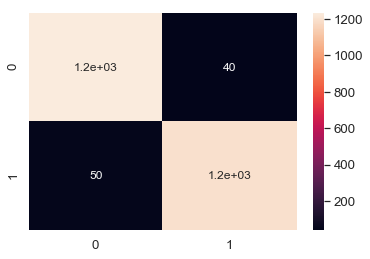

In [32]:
df_cm = pd.DataFrame(feat_all_report.loc[5]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

Below is the results dataframe for the protein encoding data when selecting 99 features on chi-squared. 

In [33]:
feat_protein_report.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.955556,0.98647,0.954594,[[1226 46] [ 66 1182]]
1,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.953968,0.986537,0.952995,[[1227 45] [ 71 1177]]
2,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.953968,0.987178,0.953129,[[1229 43] [ 73 1175]]
3,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.948413,0.986507,0.947298,[[1221 51] [ 79 1169]]
4,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.961111,0.990235,0.960591,[[1223 49] [ 49 1199]]
5,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.964683,0.990228,0.964351,[[1229 43] [ 46 1202]]
6,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.961111,0.990304,0.960526,[[1229 43] [ 55 1193]]
7,"RF{'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.964286,0.990149,0.963685,[[1234 38] [ 52 1196]]
8,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 2}",0.799603,0.799886,0.785747,[[1090 182] [ 323 925]]
9,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 5}",0.799603,0.799886,0.785747,[[1090 182] [ 323 925]]


The results on the protein encodings are similar to the results for the all encodings data: it's clear that Random Forest algorithms with the exact same parameters as above outperform all other algorithms on accuracy, f1, and confusion matrix. Below is the confusion matrix:

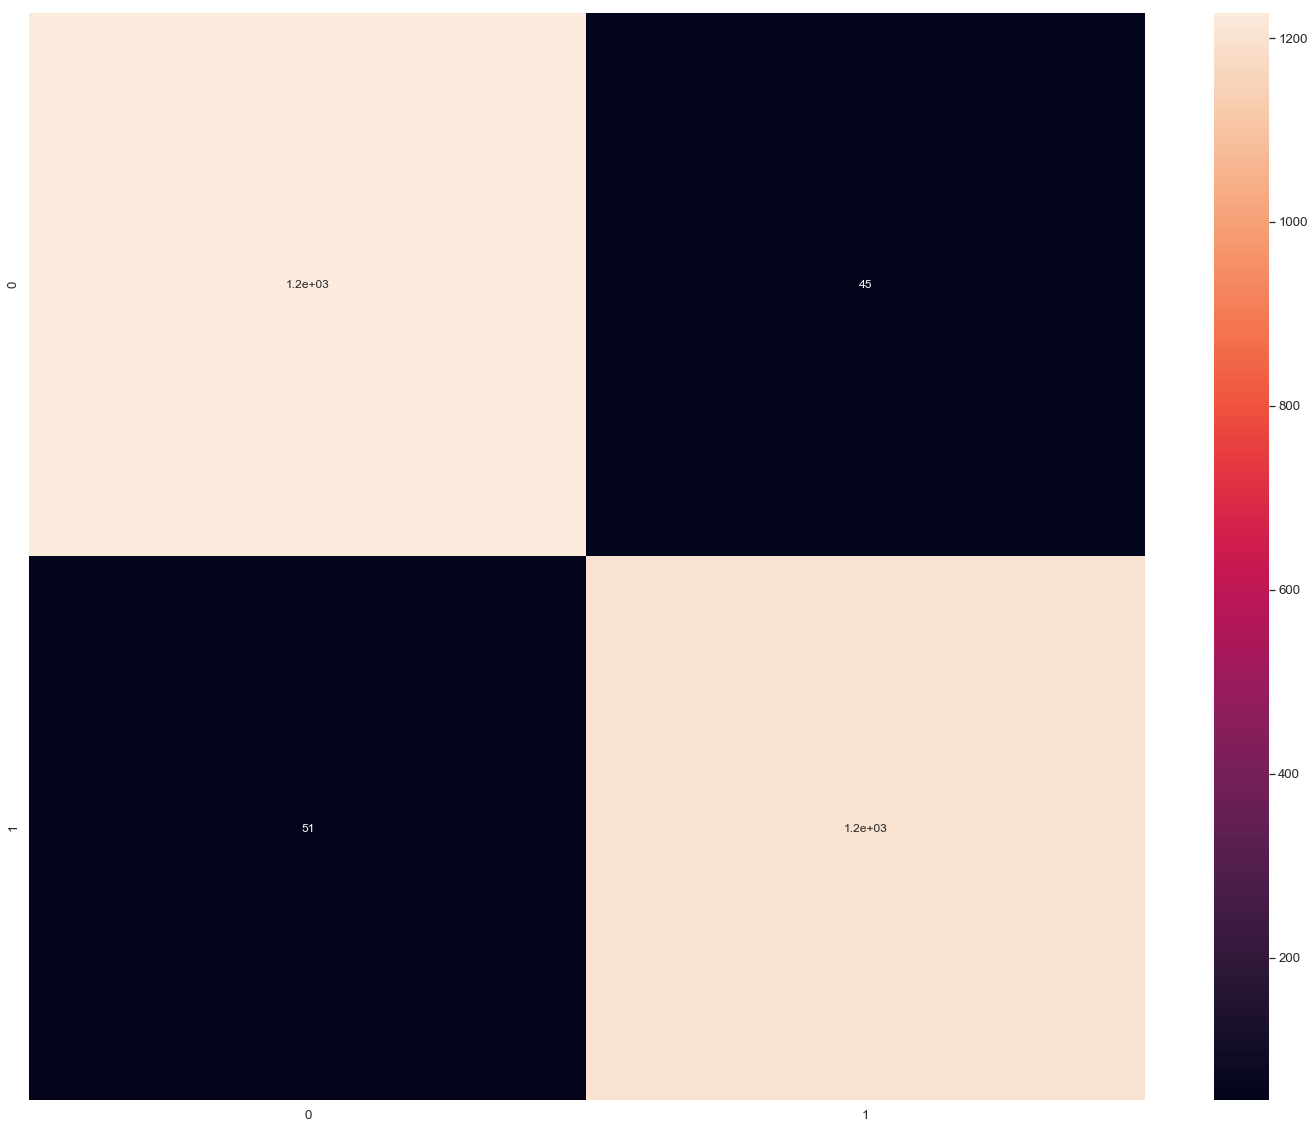

In [33]:
df_cm = pd.DataFrame(feat_protein_report.loc[5]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

When selecting features the top 99 features using chi-squared, which chooses features with the highest chi-squared scores (thus measuring how correlated a feature is to the label), it's clear that Random Forests becomes the strongest classification algorithm in both datasets. 

#### d.	Using Keras, build a deep learning classifier that performs the same classification task, and determine the learning curve (relationship of number of training samples to prediction accuracy) for your network, recommend using at least 10 training set sizes to estimate the learning curve.

The call to the script below calls a function that deploys a keras deep learning algorithm which runs 10 epochs for each k-fold. For each k-fold, this call prints out the accuracy and loss curves (learning curves), and appends the accuracy and loss scores to a list. I'll average that list out in reporting the overall accuracy and loss metrics for this model. I'll start by running the deep learning classifiers for the all encodings data.

This is k-fold: 1
Epoch 1/10
1120/1120 [==============================] - 4s 3ms/step - loss: 0.8988 - acc: 0.9054
Epoch 2/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5437 - acc: 0.9500
Epoch 3/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3955 - acc: 0.9688
Epoch 4/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3576 - acc: 0.9705
Epoch 5/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.9921 - acc: 0.9321
Epoch 6/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.4892 - acc: 0.9607
Epoch 7/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.3123 - acc: 0.9786
Epoch 8/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.3740 - acc: 0.9750
Epoch 9/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.2662 - acc: 0.9821
Epoch 10/10
280/280 [==============================] - 2s 6ms/step


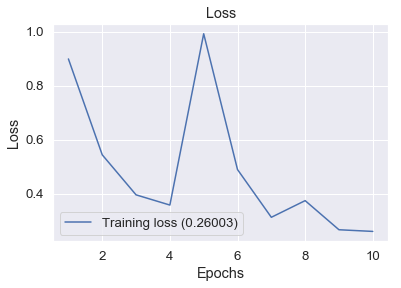

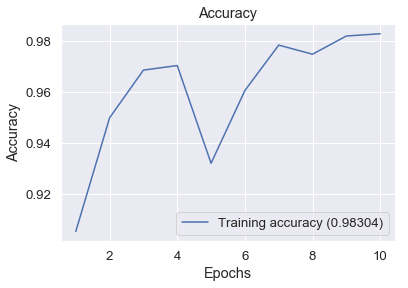

This is k-fold: 2
Epoch 1/10
1120/1120 [==============================] - 4s 4ms/step - loss: 1.2600 - acc: 0.8768
Epoch 2/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.6781 - acc: 0.9455
Epoch 3/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.6956 - acc: 0.9420
Epoch 4/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.6086 - acc: 0.9536
Epoch 5/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.6498 - acc: 0.9509
Epoch 6/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5988 - acc: 0.9571
Epoch 7/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5558 - acc: 0.9643
Epoch 8/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5667 - acc: 0.9625
Epoch 9/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5994 - acc: 0.9616
Epoch 10/10
280/280 [==============================] - 1s 3ms/step


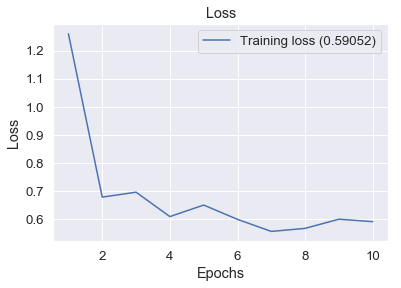

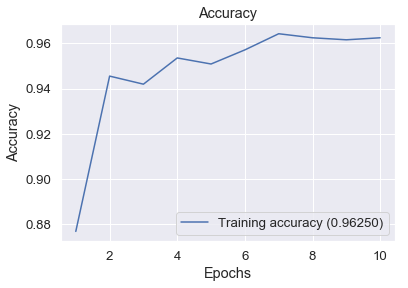

This is k-fold: 3
Epoch 1/10
1120/1120 [==============================] - 5s 4ms/step - loss: 1.3860 - acc: 0.8652
Epoch 2/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.4062 - acc: 0.9607
Epoch 3/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.3913 - acc: 0.9643A: 1s - los
Epoch 4/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.2828 - acc: 0.9759
Epoch 5/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.2754 - acc: 0.9759A: 1s - loss: 0.
Epoch 6/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.2629 - acc: 0.9804
Epoch 7/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.3761 - acc: 0.9705
Epoch 8/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.1932 - acc: 0.9848
Epoch 9/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.1573 - acc: 0.9902
Epoch 10/10
280/280 [==============================] - 1s 3ms/step


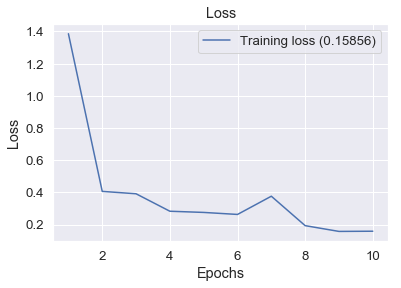

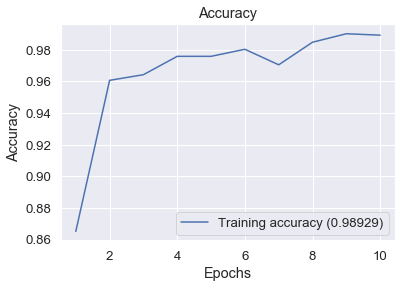

This is k-fold: 4
Epoch 1/10
1120/1120 [==============================] - 4s 3ms/step - loss: 1.1278 - acc: 0.8786
Epoch 2/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.7795 - acc: 0.9321
Epoch 3/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.8024 - acc: 0.9393
Epoch 4/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.7665 - acc: 0.9375
Epoch 5/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.5570 - acc: 0.9598
Epoch 6/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.4172 - acc: 0.9679
Epoch 7/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5058 - acc: 0.9625
Epoch 8/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.4279 - acc: 0.9688
Epoch 9/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3623 - acc: 0.9759
Epoch 10/10
280/280 [==============================] - 1s 3ms/step


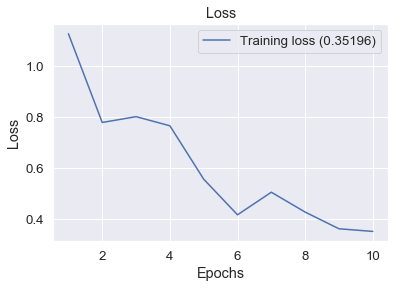

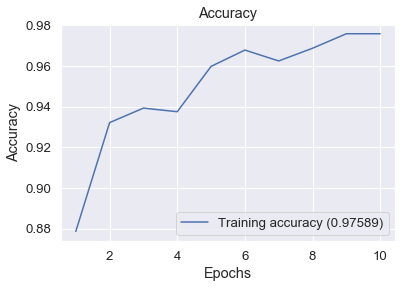

This is k-fold: 5
Epoch 1/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.9495 - acc: 0.8955
Epoch 2/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3740 - acc: 0.9625
Epoch 3/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3811 - acc: 0.9643
Epoch 4/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3770 - acc: 0.9670
Epoch 5/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.3230 - acc: 0.9741
Epoch 6/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.2984 - acc: 0.9768
Epoch 7/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.2000 - acc: 0.9875
Epoch 8/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.1999 - acc: 0.9875
Epoch 9/10
1120/1120 [==============================] - 3s 2ms/step - loss: 0.1999 - acc: 0.9875
Epoch 10/10
280/280 [==============================] - 1s 5ms/step


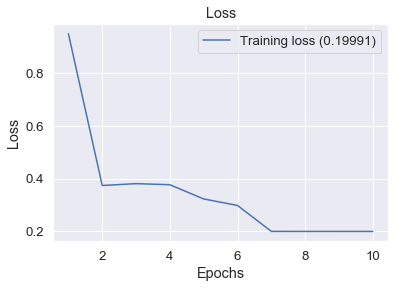

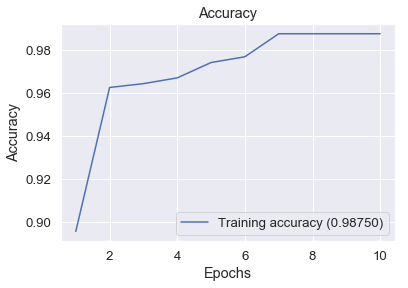

In [52]:
kerasacc_all, kerasloss_all = cs.deep_learning(alls, 'Type', 5, False)

In [53]:
kerasacc_all

0.9378571425165448

In [54]:
kerasloss_all

0.8001404306572762

It's clear from the results above that accuracy increases across epochs for all the k-folds, and loss decreases across epochs. These learning curves determine that the deep learning classifier is working adequately as training samples increase. In addition, the mean accuracy across the k-folds is 93.7%, while loss is 0.8. It's concerning that the deep learning classifier did not result in a better accuracy, but perhaps with more epochs it might have done so. 

Next, I'll run the deep learning classifiers for the protein encodings data. 

This is k-fold: 1
Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.7563 - acc: 0.8964
Epoch 2/10
1120/1120 [==============================] - 1s 743us/step - loss: 0.2570 - acc: 0.9696
Epoch 3/10
1120/1120 [==============================] - 1s 727us/step - loss: 0.2684 - acc: 0.9741
Epoch 4/10
1120/1120 [==============================] - 1s 722us/step - loss: 0.3547 - acc: 0.9732
Epoch 5/10
1120/1120 [==============================] - 1s 720us/step - loss: 0.3916 - acc: 0.9688
Epoch 6/10
1120/1120 [==============================] - 1s 735us/step - loss: 0.4715 - acc: 0.9589
Epoch 7/10
1120/1120 [==============================] - 1s 719us/step - loss: 0.3838 - acc: 0.9696
Epoch 8/10
1120/1120 [==============================] - 1s 727us/step - loss: 0.2540 - acc: 0.9768
Epoch 9/10
1120/1120 [==============================] - 1s 722us/step - loss: 0.2208 - acc: 0.9804
Epoch 10/10
280/280 [==============================] - 1s 2ms/step


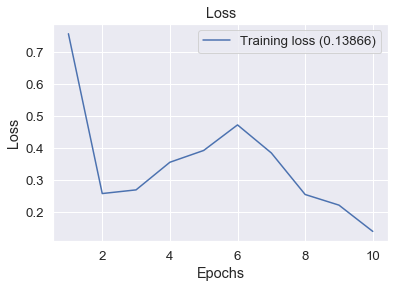

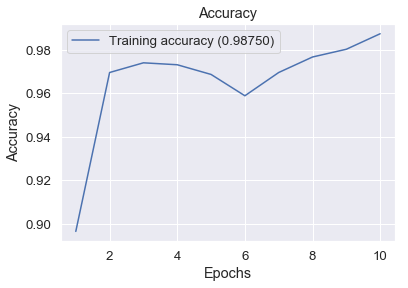

This is k-fold: 2
Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5242 - acc: 0.9089
Epoch 2/10
1120/1120 [==============================] - 1s 979us/step - loss: 0.2590 - acc: 0.9661
Epoch 3/10
1120/1120 [==============================] - 1s 723us/step - loss: 0.2158 - acc: 0.9750
Epoch 4/10
1120/1120 [==============================] - 1s 704us/step - loss: 0.2312 - acc: 0.9741
Epoch 5/10
1120/1120 [==============================] - 1s 719us/step - loss: 0.1688 - acc: 0.9813
Epoch 6/10
1120/1120 [==============================] - 1s 717us/step - loss: 0.1542 - acc: 0.9857
Epoch 7/10
1120/1120 [==============================] - 1s 720us/step - loss: 0.1897 - acc: 0.9821
Epoch 8/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.1319 - acc: 0.9893
Epoch 9/10
1120/1120 [==============================] - 1s 895us/step - loss: 0.1626 - acc: 0.9884
Epoch 10/10
280/280 [==============================] - 1s 3ms/step


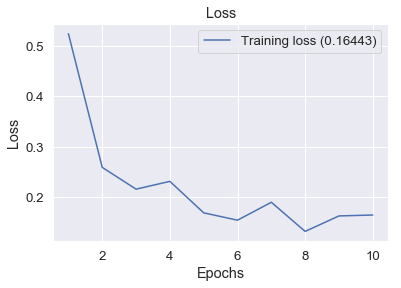

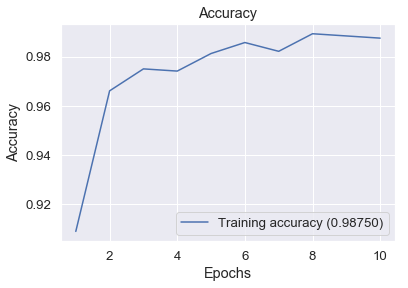

This is k-fold: 3
Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.5232 - acc: 0.9125
Epoch 2/10
1120/1120 [==============================] - 1s 732us/step - loss: 0.2935 - acc: 0.9634
Epoch 3/10
1120/1120 [==============================] - 1s 700us/step - loss: 0.2523 - acc: 0.9723
Epoch 4/10
1120/1120 [==============================] - 1s 998us/step - loss: 0.2141 - acc: 0.9741
Epoch 5/10
1120/1120 [==============================] - 1s 860us/step - loss: 0.1475 - acc: 0.9839 0s - loss: 0.1499 - acc: 0.98 - ETA: 0s - loss: 0.1367 - acc: 0.984
Epoch 6/10
1120/1120 [==============================] - 1s 839us/step - loss: 0.1782 - acc: 0.9830
Epoch 7/10
1120/1120 [==============================] - 1s 832us/step - loss: 0.1364 - acc: 0.9893
Epoch 8/10
1120/1120 [==============================] - 1s 1ms/step - loss: 0.1674 - acc: 0.9866
Epoch 9/10
1120/1120 [==============================] - 1s 987us/step - loss: 0.1348 - acc: 0.9902
Epoch 10/10
280/280 [======

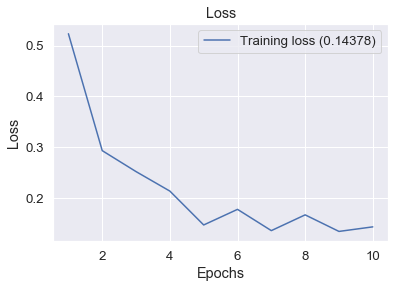

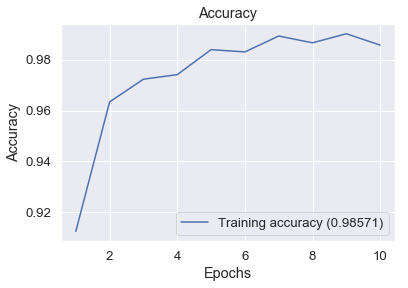

This is k-fold: 4
Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 0.4607 - acc: 0.9062
Epoch 2/10
1120/1120 [==============================] - 1s 721us/step - loss: 0.2878 - acc: 0.9527
Epoch 3/10
1120/1120 [==============================] - 1s 733us/step - loss: 0.2709 - acc: 0.9652
Epoch 4/10
1120/1120 [==============================] - 1s 681us/step - loss: 0.2157 - acc: 0.9714
Epoch 5/10
1120/1120 [==============================] - 1s 718us/step - loss: 0.1775 - acc: 0.9795
Epoch 6/10
1120/1120 [==============================] - 1s 806us/step - loss: 0.1428 - acc: 0.9821
Epoch 7/10
1120/1120 [==============================] - 1s 723us/step - loss: 0.1415 - acc: 0.9848
Epoch 8/10
1120/1120 [==============================] - 1s 691us/step - loss: 0.0925 - acc: 0.9821
Epoch 9/10
1120/1120 [==============================] - 1s 787us/step - loss: 0.0760 - acc: 0.9902
Epoch 10/10
280/280 [==============================] - 1s 2ms/step


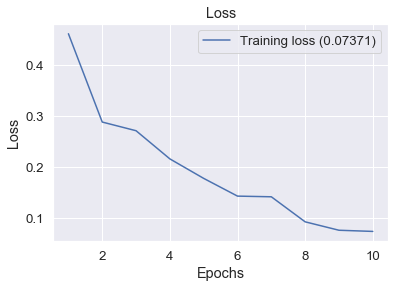

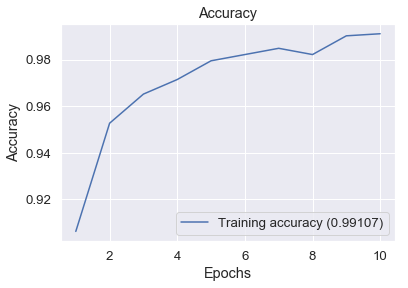

This is k-fold: 5
Epoch 1/10
1120/1120 [==============================] - 3s 3ms/step - loss: 0.9332 - acc: 0.8911
Epoch 2/10
1120/1120 [==============================] - 1s 767us/step - loss: 0.2512 - acc: 0.9723
Epoch 3/10
1120/1120 [==============================] - 1s 873us/step - loss: 0.1842 - acc: 0.9786
Epoch 4/10
1120/1120 [==============================] - 1s 698us/step - loss: 0.2480 - acc: 0.9741
Epoch 5/10
1120/1120 [==============================] - 1s 696us/step - loss: 0.1310 - acc: 0.9884
Epoch 6/10
1120/1120 [==============================] - 1s 699us/step - loss: 0.2702 - acc: 0.9759
Epoch 7/10
1120/1120 [==============================] - 1s 714us/step - loss: 0.1568 - acc: 0.9884
Epoch 8/10
1120/1120 [==============================] - 1s 708us/step - loss: 0.1251 - acc: 0.9893
Epoch 9/10
1120/1120 [==============================] - 1s 826us/step - loss: 0.1462 - acc: 0.9866
Epoch 10/10
280/280 [==============================] - 1s 2ms/step


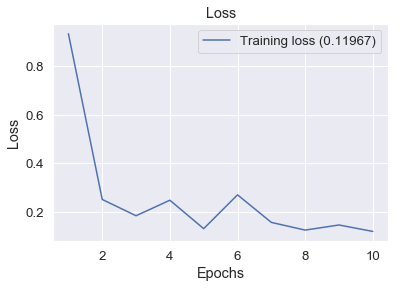

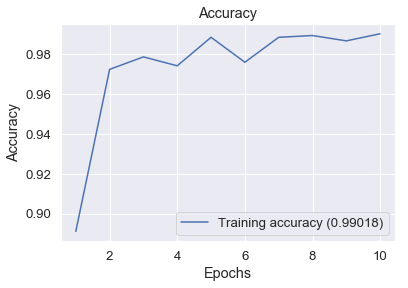

In [55]:
kerasacc_protein, kerasloss_protein = cs.deep_learning(protein, 'Type', 5, False)

In [56]:
kerasacc_protein

0.9557142850330897

In [58]:
kerasloss_protein

0.5104813826688016

As with the all encodings data, the deep learning algorithms for the protein encoding data resulted in good accuracy and loss validation curves that across epochs approached 1 and 0 respectively. As with the deep learning models for all encodings, the accuracy was lower than the best classical machine learning models (95.6%), which is concerning. That said, loss was less for protein encodings (0.51)

## Part 2.  Cancer Type Classifier for 18 Common Tumor Types.

In [34]:
protein_type, all_type = cs.read_csv(['Data/type.coding.csv', 'Data/type.all.csv'], 1000)

#### a.	Using SciKit Learn build a machine learning classifier that classifies Cancer Type from the type.coding.csv and type.all.csv files.  Compare the coding vs all genes cases.

In [35]:
models = ['RF', 'DT', 'NB']

In [36]:
protein_type_report = cs.classical_ml(protein_type, 'Type', 5, 'test', models, 'models', False, 99, True)

RF
DT
NB
RF
DT
NB
RF
DT
NB
RF
DT
NB
RF
DT
NB


In [38]:
all_type_report = cs.classical_ml(all_type, 'Type', 5, 'test', models, 'models', False, 99, True)

RF
DT
NB
RF
DT
NB
RF
DT
NB
RF
DT
NB
RF
DT
NB


The script for the multiple classification is exactly the same as for binary classification. This is because the models I've chosen are already adapted for multiclass classification. For both datasets, my machine learning script runs three classification models: Random Forests, Decision Trees, and Naive Bayes across a number of different parameters using a magic loop. Prior to running the magic loop, my script splits the dataset into feature and label dataframes, determines whether it needs to select features and how many(for part c), and then does the cross validation using the sklearn K_Fold method. It passes the train, test pairs from k_fold into the magic loop, collects the results, and outputs them in a dataframe that includes accuracy, auc-roc, f1 score at a 5% threshold, and the confusion matrix of all model iterations. 

#### b.	Using model selection methods of your choice, determine which classical ML method performs best.

In [9]:
all_type_report.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1, 'n_jobs': -1}",0.105041,nan,nan,[[296 0 0 110 22 2 0 0 0 0 0 0 0 0 3 0 100 0] [ 0 0 0 126 124 108 0 0 0 0 0 0 0 0 58 0 126 0] [ 0 0 0 108 112 152 0 0 0 0 0 0 0 0 57 0 116 0] [ 0 0 0 120 120 112 0 0 0 0 0 0 0 0 58 0 132 0] [ 0 0 0 106 124 130 0 0 0 0 0 0 0 0 65 0 110 0] [ 0 0 0 118 106 120 0 0 0 0 0 0 0 0 56 0 144 0] [ 0 0 0 104 116 114 0 0 0 0 0 0 0 0 68 0 130 0] [ 2 0 0 118 126 128 0 0 0 0 0 0 0 0 58 0 110 0] [ 2 0 0 140 126 90 0 0 104 0 0 0 0 0 66 0 6 0] [ 1 0 0 110 112 120 0 0 0 0 0 0 0 0 64 0 130 0] [ 0 0 0 110 138 124 0 0 0 0 0 0 0 0 61 0 106 0] [ 10 0 0 126 104 122 0 0 0 0 0 0 0 0 53 0 132 0] [ 4 0 0 120 126 122 0 0 0 0 0 0 0 0 54 0 120 0] [ 0 0 0 110 114 124 0 0 0 0 0 0 0 0 66 0 120 0] [ 1 0 0 16 126 110 0 0 0 0 0 0 0 0 153 0 144 0] [ 0 0 0 156 98 146 0 0 2 0 0 0 0 0 49 0 102 0] [ 0 0 0 154 108 104 0 0 0 0 0 0 0 0 65 0 104 0] [ 4 0 0 98 122 114 0 0 4 0 0 0 0 0 70 0 118 0]]
1,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 10}",0.0947531,nan,nan,[[210 0 0 0 0 0 0 0 0 0 0 0 0 0 0 203 120 0] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 308 108 126] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 283 152 110] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 310 112 120] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 299 130 106] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 306 120 118] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 314 114 104] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 296 128 118] [ 0 0 0 0 0 0 0 0 210 0 0 0 0 0 0 184 0 140] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 305 120 112] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 305 124 110] [ 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 299 122 124] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 304 122 120] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 300 124 110] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 50 270 110 120] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 249 146 158] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 277 104 154] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 318 114 98]]
2,NB{},0.175617,nan,nan,[[265 2 6 0 0 10 0 4 0 0 1 243 2 0 0 0 0 0] [ 21 56 60 2 2 8 11 4 0 1 11 357 0 4 0 5 0 0] [ 33 4 196 20 0 2 2 4 0 0 0 279 2 2 0 1 0 0] [ 18 4 170 81 0 11 0 5 0 1 3 237 0 8 2 0 0 2] [ 12 4 144 15 31 8 5 3 0 1 4 275 0 23 3 7 0 0] [ 38 4 45 2 0 53 6 11 0 2 9 358 0 7 0 4 2 3] [ 39 14 41 2 0 15 25 18 4 0 6 360 0 4 2 2 0 0] [ 38 0 6 0 0 2 0 71 2 0 1 422 0 0 0 0 0 0] [ 43 0 47 0 0 0 0 6 46 0 2 382 0 4 2 2 0 0] [ 41 25 64 4 0 2 2 12 1 33 0 331 0 14 4 4 0 0] [ 16 19 81 8 0 10 9 8 0 8 51 314 0 11 0 2 2 0] [ 79 2 6 0 0 2 0 14 2 0 4 431 0 0 2 5 0 0] [ 42 2 125 12 0 8 0 26 2 2 4 294 11 8 4 6 0 0] [ 17 12 54 3 0 3 2 19 2 0 0 274 0 144 0 2 0 2] [ 29 0 35 4 0 0 2 0 0 2 2 434 0 0 40 2 0 0] [ 21 3 82 4 0 7 0 12 2 0 8 351 0 10 2 47 2 2] [ 36 37 47 10 0 7 10 15 0 5 11 288 0 36 0 13 20 0] [ 19 11 8 3 0 14 2 3 0 0 13 299 0 49 0 0 3 106]]


The multilabel classifiers are fairly weak across the board, this is principally because I had to run a reduced set of parameters per classifer due to how long a bigger grid was taking. When comparing the three algorithms ran, it's clear that Naive Bayes outperformed Random Forest and Decision Trees with a 17.6% accuracy. It's confusion matrix is below:

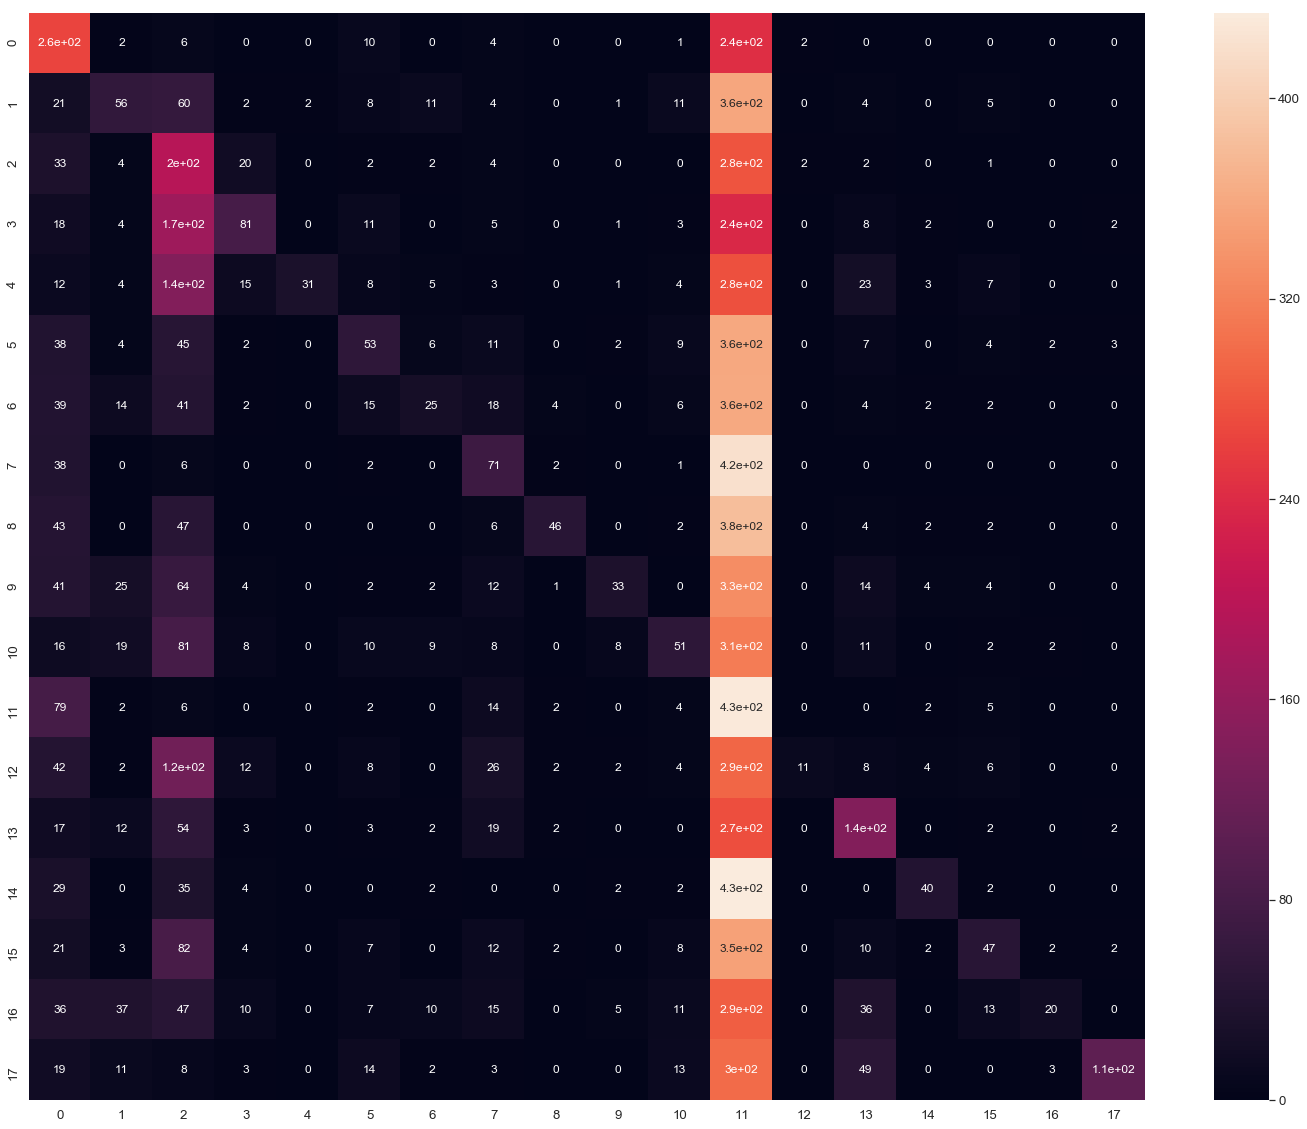

In [39]:
df_cm = pd.DataFrame(all_type_report.loc[2]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

In [10]:
protein_type_report.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1, 'n_jobs': -1}",0.099177,nan,nan,[[232 0 8 6 4 0 0 0 120 0 0 0 67 0 0 96 0 0] [ 0 0 126 124 0 0 0 0 108 0 0 0 58 0 0 126 0 0] [ 0 0 110 112 0 0 0 0 152 0 0 0 55 0 0 116 0 0] [ 0 0 120 120 0 0 0 0 112 0 0 0 58 0 0 132 0 0] [ 8 0 104 118 100 0 0 0 130 0 0 0 65 0 0 10 0 0] [ 0 0 118 106 0 0 0 0 120 0 0 0 55 0 1 144 0 0] [ 0 0 104 116 0 0 0 0 114 0 0 0 68 0 0 130 0 0] [ 2 0 118 126 0 0 0 0 128 0 0 0 58 0 0 110 0 0] [ 0 0 140 128 0 0 0 0 90 0 0 0 66 0 0 110 0 0] [ 0 0 112 112 0 0 0 0 120 0 0 0 62 0 1 130 0 0] [ 0 0 110 138 0 0 0 0 124 0 0 0 61 0 0 106 0 0] [ 0 0 126 114 0 0 0 0 122 0 0 0 53 0 0 132 0 0] [ 0 0 120 130 0 0 0 0 122 0 0 0 54 0 0 120 0 0] [ 0 0 110 114 0 0 0 0 124 0 0 0 66 0 0 120 0 0] [ 0 0 120 126 0 0 0 0 4 0 0 0 2 0 154 144 0 0] [ 0 0 158 98 0 0 0 0 144 0 0 0 47 0 2 104 0 0] [ 0 0 154 108 0 0 0 0 104 0 0 0 65 0 0 104 0 0] [ 0 0 98 126 0 0 0 0 114 0 0 0 70 0 0 122 0 0]]
1,"DT{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'min_samples_split': 10}",0.0947531,nan,nan,[[210 0 0 0 0 0 0 0 0 0 0 0 0 0 0 203 120 0] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 308 108 126] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 283 152 110] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 310 112 120] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 299 130 106] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 306 120 118] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 314 114 104] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 296 128 118] [ 0 0 0 0 0 0 0 0 210 0 0 0 0 0 0 184 0 140] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 305 120 112] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 305 124 110] [ 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 299 122 124] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 304 122 120] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 300 124 110] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 50 270 110 120] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 249 146 158] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 277 104 154] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 318 114 98]]
2,NB{},0.793416,nan,nan,[[494 0 0 3 0 2 6 0 0 4 2 20 0 0 0 2 0 0] [ 0 415 0 0 2 6 54 0 0 4 19 16 0 3 0 9 14 0] [ 0 1 450 37 0 10 0 2 0 6 3 23 0 6 0 7 0 0] [ 2 0 62 428 0 0 1 1 0 2 7 10 0 23 0 6 0 0] [ 0 2 2 11 362 7 0 0 0 11 109 7 0 20 0 0 4 0] [ 8 0 2 0 0 433 45 0 0 0 25 13 0 5 0 13 0 0] [ 2 52 2 2 0 65 346 3 0 8 27 12 0 2 0 6 5 0] [ 0 2 2 2 0 1 7 451 0 2 5 36 0 32 0 2 0 0] [ 4 0 0 0 0 13 0 0 416 3 7 29 0 28 0 34 0 0] [ 0 4 0 2 0 0 6 2 0 437 49 17 0 13 0 5 2 0] [ 0 44 0 0 0 9 33 2 0 12 380 15 0 18 0 7 19 0] [ 20 4 2 0 0 2 3 1 0 2 6 501 0 0 0 0 0 6] [ 0 0 2 14 0 39 2 2 0 0 3 4 417 40 0 23 0 0] [ 0 6 3 0 0 4 2 13 0 2 14 8 0 473 0 4 5 0] [ 0 0 5 8 0 0 2 2 0 70 3 4 0 8 444 4 0 0] [ 2 0 5 0 0 30 21 0 0 4 25 10 0 14 0 432 10 0] [ 2 41 0 0 0 0 15 2 0 3 31 2 0 35 0 4 397 3] [ 2 0 0 0 0 0 0 0 0 0 26 47 0 9 0 0 10 436]]


As with the all type encodings, the protein encodings resulted in weak classification. That said, it's clearly evident that Naive Bayes is the best performing algorithm by a long shot. It has an accuracy mean of 79%, which is far more than the accuracy mean obtained by Random Forests or Decision Trees. It's confusion matrix is below:

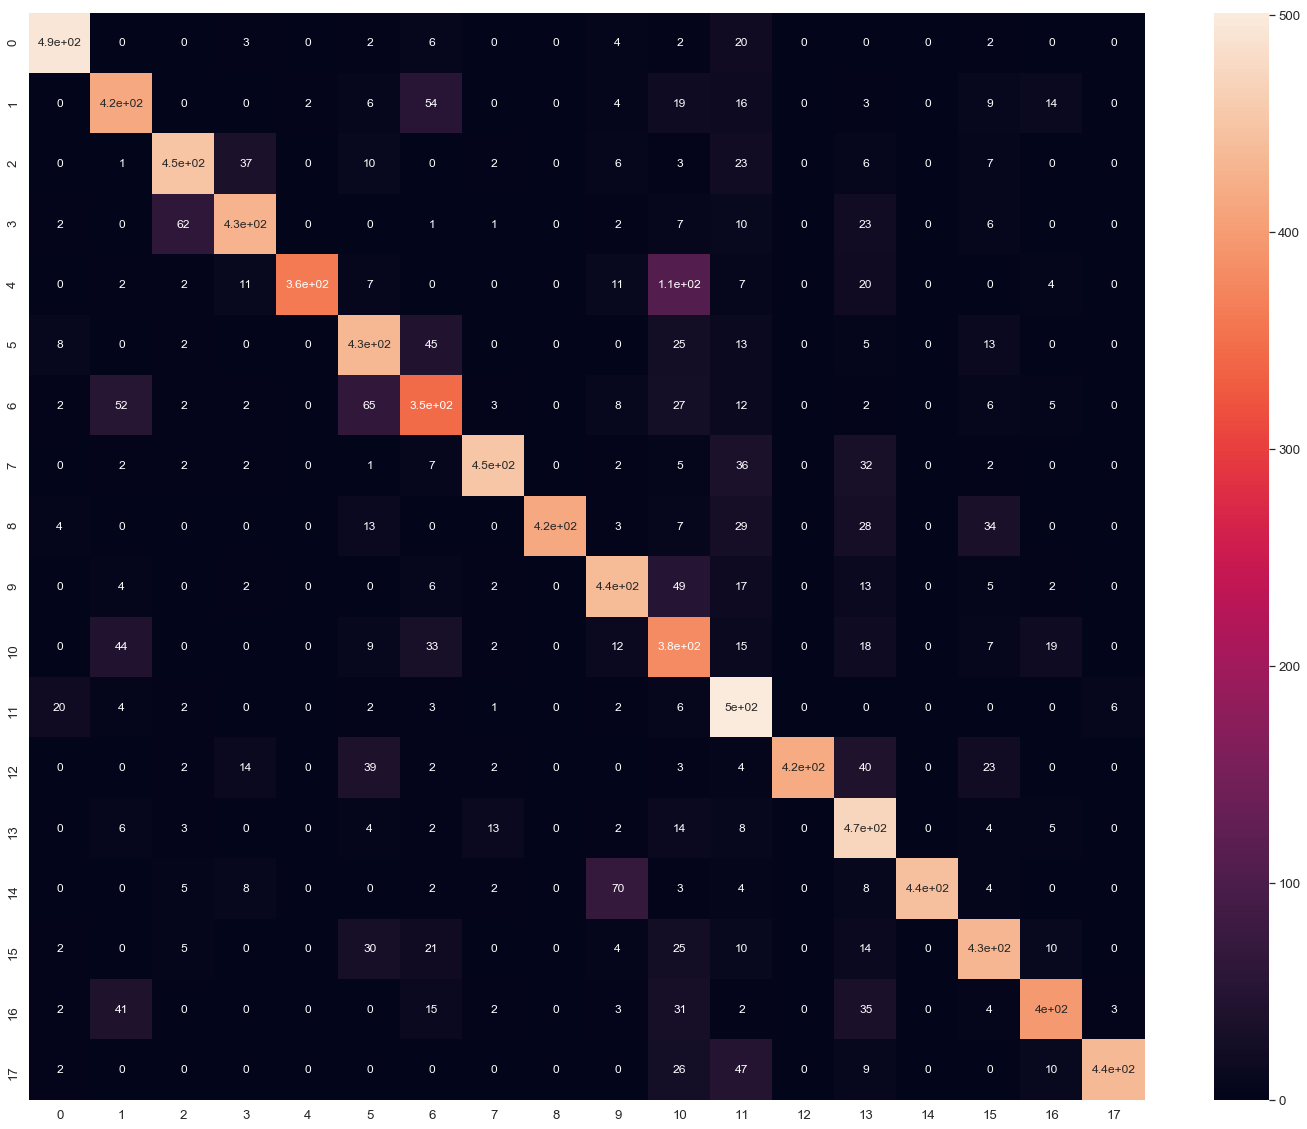

In [37]:
df_cm = pd.DataFrame(protein_type_report.loc[2]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

#### c.	Using feature selection methods of your choice, determine a < 100 gene signature that can be used to classify tumor type. 

In [6]:
all_type_report_feats = cs.classical_ml(all_type, 'Type', 5, 'small', models, 'models', True, 99, True)

features selected: Index(['ENSG00000080910.10', 'ENSG00000101981.9', 'ENSG00000112337.9',
       'ENSG00000124900.11', 'ENSG00000132703.3', 'ENSG00000135220.9',
       'ENSG00000145321.11', 'ENSG00000158731.2', 'ENSG00000164325.7',
       'ENSG00000168515.3', 'ENSG00000184566.3', 'ENSG00000186146.1',
       'ENSG00000199629.1', 'ENSG00000202285.1', 'ENSG00000207816.1',
       'ENSG00000207933.2', 'ENSG00000211928.1', 'ENSG00000212057.1',
       'ENSG00000212199.1', 'ENSG00000212525.1', 'ENSG00000216020.2',
       'ENSG00000221385.1', 'ENSG00000223400.1', 'ENSG00000223914.1',
       'ENSG00000224087.1', 'ENSG00000224924.5', 'ENSG00000225765.1',
       'ENSG00000226733.1', 'ENSG00000227157.1', 'ENSG00000227306.1',
       'ENSG00000227869.1', 'ENSG00000229035.2', 'ENSG00000232153.2',
       'ENSG00000234104.1', 'ENSG00000234918.1', 'ENSG00000236267.1',
       'ENSG00000236666.1', 'ENSG00000237581.1', 'ENSG00000238102.1',
       'ENSG00000238194.1', 'ENSG00000241911.1', 'ENSG00000244239.1'

In [7]:
protein_type_report_feats = cs.classical_ml(protein_type, 'Type', 5, 'small', models, 'models', True, 99, True)

features selected: Index(['ENSG00000021852.11', 'ENSG00000057149.13', 'ENSG00000066813.13',
       'ENSG00000072080.9', 'ENSG00000077498.8', 'ENSG00000079557.4',
       'ENSG00000080910.10', 'ENSG00000081800.7', 'ENSG00000090402.6',
       'ENSG00000101323.4', 'ENSG00000101981.9', 'ENSG00000109181.10',
       'ENSG00000110244.6', 'ENSG00000110245.10', 'ENSG00000110484.6',
       'ENSG00000111701.6', 'ENSG00000112337.9', 'ENSG00000113492.12',
       'ENSG00000122852.13', 'ENSG00000123561.13', 'ENSG00000124568.9',
       'ENSG00000124900.11', 'ENSG00000132703.3', 'ENSG00000134389.9',
       'ENSG00000135220.9', 'ENSG00000136297.13', 'ENSG00000136352.16',
       'ENSG00000137251.14', 'ENSG00000142484.6', 'ENSG00000142515.13',
       'ENSG00000143278.3', 'ENSG00000145321.11', 'ENSG00000145826.7',
       'ENSG00000146039.9', 'ENSG00000157131.10', 'ENSG00000159182.4',
       'ENSG00000159516.8', 'ENSG00000163202.4', 'ENSG00000163209.13',
       'ENSG00000163216.6', 'ENSG00000163581.12', 'ENS

The calls to the script above pulled out 99 features for each dataset (protein type and all encoding type) using the SelectKBest method with chi-squared as the argument. As stated above, this found the features most correlated with the label and selected them as the set of features to be included.

In [8]:
all_type_report_feats.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.745885,nan,nan,[[526 0 0 0 0 0 0 4 0 0 0 3 0 0 0 0 0 0] [ 0 66 0 0 0 2 118 0 2 6 0 4 2 4 2 6 320 10] [ 0 0 479 50 0 0 4 0 0 2 0 0 0 4 0 0 4 2] [ 0 1 101 416 0 0 0 0 0 1 2 0 1 6 0 0 10 4] [ 0 1 0 0 530 0 0 0 0 0 0 0 0 0 0 0 4 0] [ 10 10 0 0 0 416 11 2 0 2 2 4 33 2 2 0 32 18] [ 0 72 0 0 2 73 96 2 2 0 4 4 8 6 2 3 244 14] [ 0 0 0 0 0 0 0 540 0 0 0 2 0 0 0 0 0 0] [ 0 0 0 0 0 0 0 0 527 0 0 0 5 0 0 0 2 0] [ 0 2 0 0 0 0 8 0 0 503 2 0 0 0 0 0 22 0] [ 6 47 0 0 0 2 86 2 17 2 9 12 0 3 3 8 284 58] [ 0 0 2 0 2 0 0 13 0 0 0 497 1 0 0 0 4 28] [ 0 0 0 0 0 15 0 8 0 0 0 0 523 0 0 0 0 0] [ 1 14 2 6 2 17 18 6 9 4 1 4 6 364 0 2 66 12] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 548 0 2 0] [ 2 13 0 0 1 2 32 0 2 4 2 1 0 4 0 446 44 0] [ 0 56 0 0 0 4 133 0 2 5 0 2 6 33 0 9 266 19] [ 2 1 2 2 0 1 2 0 0 0 0 14 1 0 1 0 6 498]]
1,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.766872,nan,nan,[[526 0 0 0 0 0 0 2 0 0 0 5 0 0 0 0 0 0] [ 0 316 0 0 0 2 28 0 0 2 10 4 2 6 2 10 150 10] [ 0 0 464 73 0 0 0 0 0 2 2 0 2 2 0 0 0 0] [ 0 1 94 427 0 0 0 0 0 0 0 0 1 5 0 0 4 10] [ 0 1 0 0 530 0 0 0 0 2 0 0 0 0 0 0 2 0] [ 10 8 0 0 0 429 7 2 0 4 4 4 30 0 0 2 28 16] [ 0 164 0 0 2 87 68 0 2 1 10 4 3 5 2 5 162 17] [ 0 0 0 0 0 0 0 540 0 0 0 2 0 0 0 0 0 0] [ 0 0 0 0 0 0 0 0 527 0 0 0 5 0 0 0 2 0] [ 0 2 0 0 0 0 0 0 0 507 4 0 0 4 0 0 20 0] [ 8 102 0 0 0 2 8 0 15 2 62 12 0 1 3 8 254 62] [ 0 0 2 0 2 0 0 14 0 0 0 495 1 0 0 0 2 31] [ 2 0 0 0 0 11 0 2 0 0 0 2 529 0 0 0 0 0] [ 1 13 2 4 2 15 6 2 9 13 7 6 8 380 0 8 48 10] [ 0 0 0 0 0 0 0 0 0 2 0 0 0 0 548 0 0 0] [ 3 19 0 0 1 2 2 1 5 4 18 0 2 2 0 444 50 0] [ 0 215 0 2 0 4 34 0 2 5 24 6 4 35 0 9 174 21] [ 5 1 0 2 2 3 0 0 0 0 2 14 1 0 0 0 12 488]]
2,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.772634,nan,nan,[[528 0 0 0 0 0 0 1 0 0 0 4 0 0 0 0 0 0] [ 2 318 0 0 0 2 24 0 0 8 10 2 4 26 2 4 130 10] [ 0 0 469 62 0 0 0 0 0 4 2 0 4 2 0 2 0 0] [ 0 1 107 413 0 0 0 0 0 3 4 0 3 5 0 0 4 2] [ 0 1 0 0 530 0 0 0 0 0 0 0 0 0 0 0 4 0] [ 12 16 0 0 0 402 8 0 2 4 2 7 49 2 0 0 22 18] [ 0 160 0 1 2 74 96 0 2 4 20 4 13 7 2 1 132 14] [ 0 0 0 0 0 0 0 540 0 0 0 2 0 0 0 0 0 0] [ 0 0 0 0 0 0 0 0 527 0 0 0 5 0 0 0 2 0] [ 0 2 0 0 0 0 0 0 0 511 6 0 0 4 0 0 14 0] [ 6 97 0 0 0 0 8 0 19 4 69 13 0 7 3 6 244 63] [ 0 0 4 0 0 0 0 9 0 0 0 503 0 0 0 0 0 31] [ 0 0 0 0 0 11 0 1 0 0 0 6 528 0 0 0 0 0] [ 1 7 3 2 2 15 2 1 11 8 1 4 2 431 0 2 36 6] [ 0 0 0 0 0 0 0 0 0 2 0 0 0 0 548 0 0 0] [ 4 17 0 0 1 2 6 1 4 4 22 0 0 8 0 440 42 2] [ 2 234 0 2 0 4 26 0 2 7 26 2 2 47 2 6 152 21] [ 3 1 0 0 0 0 0 0 0 0 2 13 0 2 0 0 4 505]]
3,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.766255,nan,nan,[[530 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0] [ 2 269 0 2 0 0 27 0 0 4 10 2 2 18 2 6 188 10] [ 0 0 464 69 0 0 0 0 0 2 2 0 0 2 0 4 2 0] [ 0 1 105 416 0 0 0 0 0 7 0 0 1 4 0 0 6 2] [ 0 1 0 0 530 0 0 0 0 2 0 0 0 0 0 0 2 0] [ 12 19 0 0 0 380 12 2 2 4 0 4 73 0 0 0 16 20] [ 0 171 0 0 2 70 98 0 2 3 14 2 16 6 2 0 130 16] [ 0 0 0 0 0 0 0 540 0 0 0 2 0 0 0 0 0 0] [ 0 0 0 0 0 0 0 0 527 0 0 0 5 0 0 0 2 0] [ 0 8 0 0 0 0 2 0 0 505 8 0 0 2 0 0 12 0] [ 8 157 0 0 0 0 8 0 17 5 62 8 0 5 2 3 198 66] [ 0 0 2 0 0 0 0 11 0 0 0 505 0 0 0 0 0 29] [ 2 0 0 0 0 9 0 0 0 0 0 4 531 0 0 0 0 0] [ 1 11 0 1 2 15 0 2 12 16 2 4 2 422 0 2 34 8] [ 0 0 0 0 0 0 0 0 0 2 0 0 0 0 548 0 0 0] [ 5 29 0 0 1 2 10 0 0 4 12 1 0 6 0 449 34 0] [ 3 229 0 0 0 4 20 0 2 6 20 0 2 45 0 9 174 21] [ 3 1 0 0 2 1 0 0 0 0 2 15 0 4 0 0 4 498]]
4,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.825206,nan,nan,[[530 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0] [ 0 437 0 0 0 2 35 0 0 4 30 2 0 18 0 6 4 4] [ 0 0 477 53 0 0 0 0 0 2 4 0 0 2 0 7 0 0] [ 0 0 72 450 0 0 0 0 0 0 3 0 3 12 0 0 0 2] [ 0 0 0 0 530 0 0 0 0 0 5 0 0 0 0 0 0 0] 

From the report above, it's clear that a Random Forest algorithm with max depth 10, max features selection using log2, 2 minimum sample split on a node, and 200 estimators was the best performing metric using mean accuracy across k-folds for the all types encoding data. It reached an accuracy of 83%. Across the board, all the Random Forests algorithms outperformed every other type of algorithm. The confusion matrix for the best algorithm is below: 

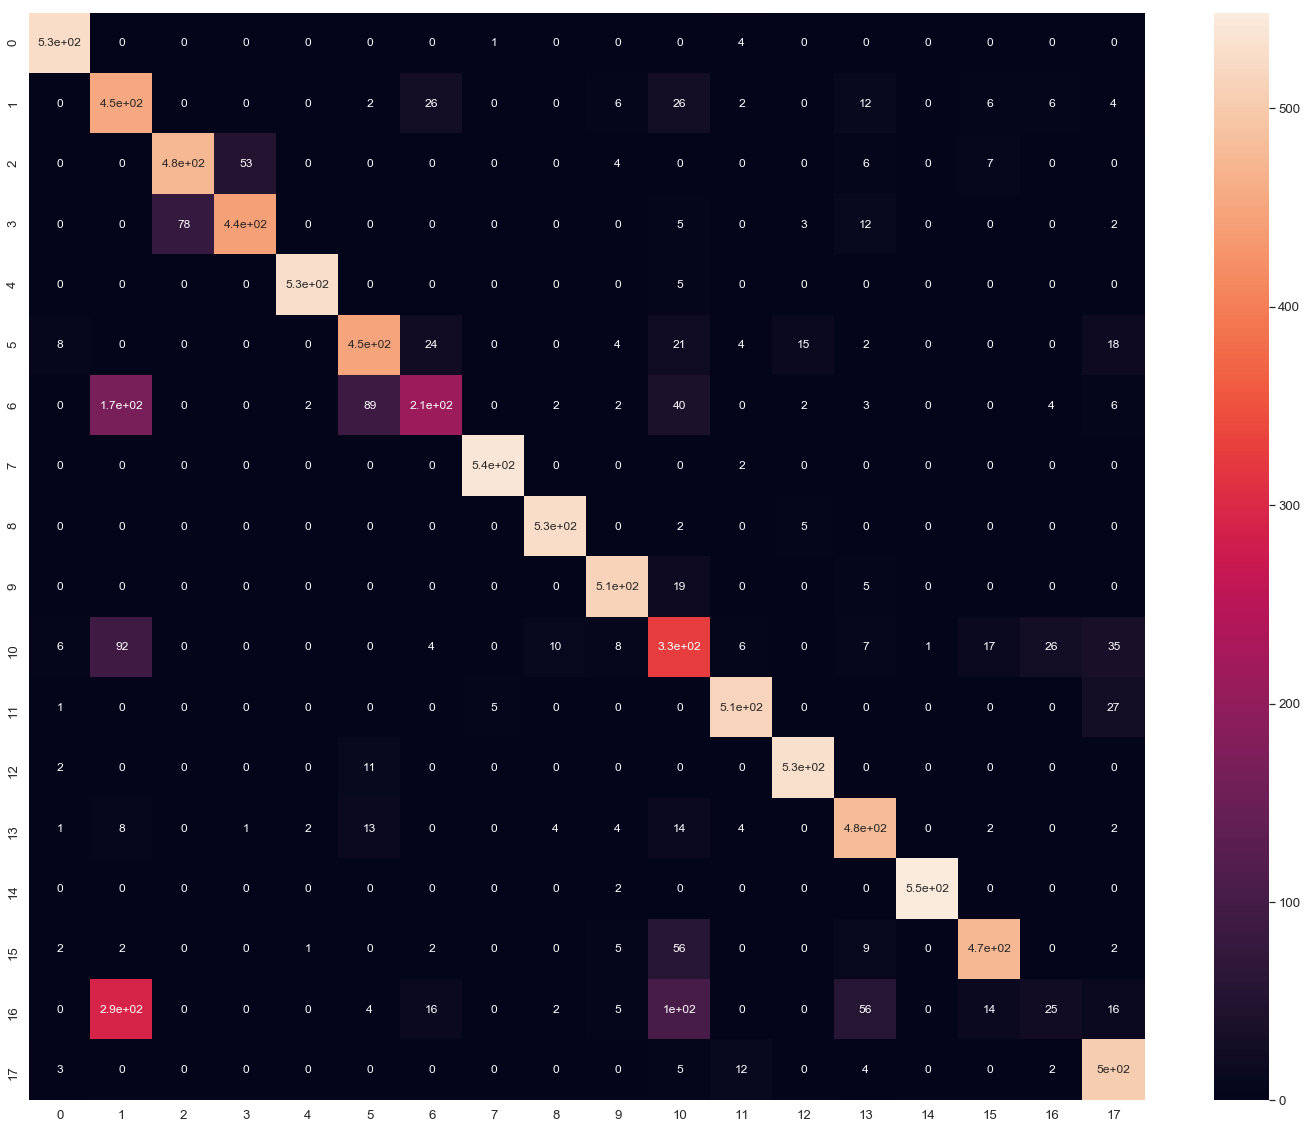

In [28]:
df_cm = pd.DataFrame(all_type_report_feats.loc[6]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})
sn.set(rc={'figure.figsize':(25,20)})

In [9]:
protein_type_report_feats.style.apply(cs.highlight_max, subset=['acc_mean', 'auc_mean', 'f1_mean'])

,models,acc_mean,auc_mean,f1_mean,conf_sum
0,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.819239,nan,nan,[[530 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [ 0 496 0 0 0 0 18 0 0 6 4 2 0 8 0 0 8 0] [ 0 0 470 46 0 0 0 2 0 2 0 3 0 2 2 18 0 0] [ 0 0 78 440 0 0 0 0 0 0 11 0 0 0 0 13 0 0] [ 0 0 6 0 522 0 0 0 0 1 0 2 0 0 0 2 2 0] [ 2 0 0 0 0 504 13 0 0 0 4 0 7 0 0 5 0 9] [ 0 75 0 0 2 96 333 1 0 2 0 2 2 2 1 6 10 0] [ 0 0 0 0 0 0 0 531 0 4 0 2 2 2 0 1 0 0] [ 0 0 0 0 0 0 0 0 529 0 0 0 1 0 0 4 0 0] [ 0 0 0 0 0 0 0 0 0 518 0 0 0 8 0 11 0 0] [ 4 146 2 4 0 1 8 7 0 2 172 8 0 16 4 71 82 12] [ 0 3 0 2 2 0 0 11 0 0 0 493 0 0 0 0 0 36] [ 0 0 0 0 0 0 0 0 0 0 0 0 546 0 0 0 0 0] [ 2 15 0 11 0 4 0 74 0 4 12 15 10 246 6 114 9 12] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 548 0 2 0] [ 2 6 0 0 1 0 14 2 2 4 4 0 0 55 0 461 0 2] [ 0 308 0 2 0 4 2 3 0 5 14 12 2 28 0 20 106 29] [ 2 0 0 0 0 0 0 0 0 0 0 10 0 0 0 0 0 518]]
1,"RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.826646,nan,nan,[[530 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [ 0 488 0 0 0 0 16 2 0 6 6 2 0 6 0 0 16 0] [ 0 0 465 49 0 0 0 2 0 2 2 3 0 0 0 22 0 0] [ 0 2 69 449 0 0 0 0 0 0 9 0 0 2 0 11 0 0] [ 0 0 4 2 522 0 0 0 0 1 2 2 0 2 0 0 0 0] [ 2 0 0 0 0 507 10 0 0 0 4 7 4 0 0 4 2 4] [ 0 85 0 0 2 91 317 1 0 2 7 0 0 2 3 2 18 2] [ 0 0 0 0 0 0 0 527 0 4 0 2 2 4 0 3 0 0] [ 0 0 0 0 0 0 0 0 529 0 0 0 1 0 0 4 0 0] [ 0 0 0 0 0 0 0 0 0 518 4 0 0 8 0 7 0 0] [ 2 118 0 6 0 1 8 9 4 2 185 10 0 18 2 65 106 3] [ 2 3 0 0 2 0 0 13 0 0 0 499 0 0 0 0 0 28] [ 0 0 0 0 0 0 0 0 0 0 0 0 546 0 0 0 0 0] [ 2 15 0 11 0 4 0 43 0 4 12 10 12 308 4 78 17 14] [ 2 0 0 0 0 0 0 0 0 0 0 0 0 0 546 0 2 0] [ 4 4 0 0 1 0 0 0 0 4 29 2 0 69 0 440 0 0] [ 0 269 0 2 0 4 4 4 4 5 13 10 2 31 0 18 139 30] [ 2 0 0 0 0 0 0 0 1 0 0 7 0 0 0 0 0 520]]
2,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.843004,nan,nan,[[528 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0] [ 0 494 0 0 0 0 14 0 0 6 6 0 0 6 0 0 16 0] [ 0 0 473 47 0 0 0 2 0 2 0 1 0 6 0 14 0 0] [ 0 2 88 430 0 0 0 0 0 0 7 0 0 4 0 11 0 0] [ 0 0 0 4 524 0 0 0 0 1 2 2 0 2 0 0 0 0] [ 0 0 0 0 0 506 11 0 0 0 4 5 7 2 0 3 0 6] [ 0 72 0 0 2 90 335 1 0 2 13 0 0 0 3 4 8 2] [ 0 0 0 0 0 0 0 531 0 4 0 2 2 0 2 1 0 0] [ 0 0 0 0 0 0 0 0 529 0 0 0 5 0 0 0 0 0] [ 0 0 0 0 0 0 0 0 0 518 2 0 0 4 4 9 0 0] [ 2 113 2 2 0 1 8 7 0 2 303 4 1 8 2 37 44 3] [ 4 9 0 0 2 0 0 8 0 0 0 486 0 0 0 0 0 38] [ 0 0 0 0 0 0 0 0 0 0 0 0 546 0 0 0 0 0] [ 4 19 0 11 0 8 2 80 0 4 4 11 6 291 4 70 10 10] [ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 548 2 0 0] [ 4 4 0 0 1 0 2 4 4 4 2 0 0 23 2 501 2 0] [ 0 257 0 0 0 4 3 8 0 5 36 11 2 25 2 21 135 26] [ 2 0 0 0 0 0 0 0 1 0 0 11 0 0 0 0 0 516]]
3,"RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}",0.837449,nan,nan,[[528 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0] [ 0 492 0 0 0 0 12 2 0 6 2 0 0 8 0 0 20 0] [ 0 0 474 44 0 0 0 4 0 2 2 1 0 2 0 16 0 0] [ 0 2 87 431 0 0 0 0 0 0 8 0 1 4 0 9 0 0] [ 0 0 0 4 524 0 0 0 0 1 2 2 0 0 0 2 0 0] [ 0 0 0 0 0 508 13 0 0 0 4 5 3 0 0 3 0 8] [ 0 80 0 0 2 93 331 0 0 2 7 0 0 2 3 2 8 2] [ 0 0 0 0 0 0 0 530 0 4 0 2 2 2 0 2 0 0] [ 0 0 0 0 0 0 0 0 529 0 0 0 3 0 0 2 0 0] [ 0 0 0 0 0 0 0 0 0 518 2 0 0 4 4 9 0 0] [ 4 110 0 4 0 2 10 9 4 2 238 8 0 10 2 53 78 5] [ 3 11 0 0 2 0 0 9 0 0 0 492 0 0 0 0 0 30] [ 0 0 0 0 0 0 0 0 0 0 0 0 546 0 0 0 0 0] [ 1 18 0 9 0 9 0 100 2 4 4 5 8 285 8 51 16 14] [ 0 0 0 0 0 0 0 0 0 0 2 0 0 0 548 0 0 0] [ 4 4 0 0 1 2 2 0 2 4 4 0 0 38 0 490 2 0] [ 0 234 0 0 0 4 4 6 4 5 30 10 2 35 2 12 156 31] [ 2 0 0 0 0 0 0 0 1 0 0 7 0 0 0 0 0 520]]
4,"RF{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}",0.895473,nan,nan,[[532 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] [ 0 442 0 0 0 0 14 0 0 4 11 0 0 4 0 4 63 0] [ 0 0 475 37 0 0 0 2 0 2 0 2 0 10 0 17 0 0] [ 0 0 36 480 0 0 0 0 0 0 11 0 0 5 0 10 0 0] [ 0 0 2 0 528 0 0 0 0 1 2 0 0 0 0 2 0 0] [ 2 0 0 0 0 514 13 0 0 0 4 2 2 0 0 

In the output above, it's clear that Random Forests is once again the best multilabel classification algorith, particularly with the following parameters: 10 max depth, number of features method of log2, a minimum sample split per node of 5, and 200 estimators. This algorithm had an 89% mean accuracy across k-folds. The confusion matrix for that instance is below:

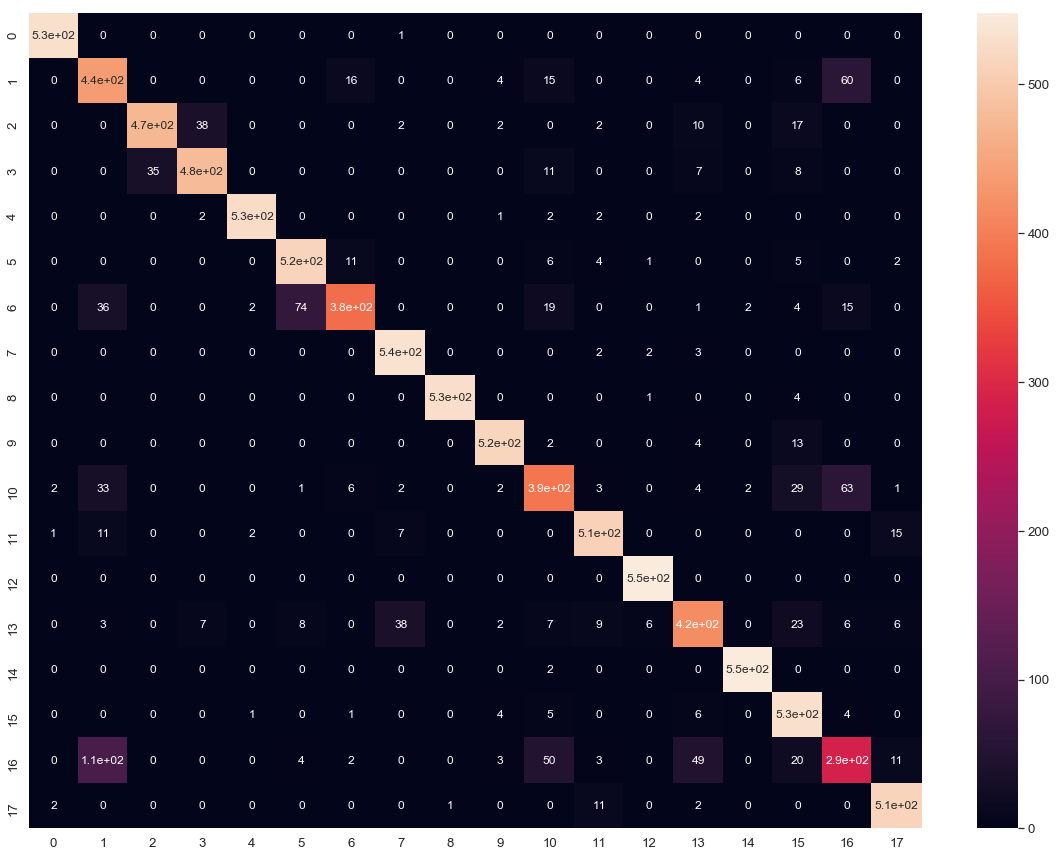

In [27]:
df_cm = pd.DataFrame(protein_type_report_feats.loc[5]['conf_sum'])
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})
sn.set(rc={'figure.figsize':(25,20)})

#### d.	Using Keras, build a deep learning classifier that performs the same classification task, and determine the learning curve (relationship of number of training samples to prediction accuracy) for your network.

This is k-fold: 1
Epoch 1/10
4320/4320 [==============================] - 40s 9ms/step - loss: 2.5729 - acc: 0.7891
Epoch 2/10
4320/4320 [==============================] - 14s 3ms/step - loss: 1.5176 - acc: 0.8866
Epoch 3/10
4320/4320 [==============================] - 15s 3ms/step - loss: 1.4679 - acc: 0.8991
Epoch 4/10
4320/4320 [==============================] - 14s 3ms/step - loss: 1.3650 - acc: 0.9067
Epoch 5/10
4320/4320 [==============================] - 13s 3ms/step - loss: 1.3063 - acc: 0.9148
Epoch 6/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.3021 - acc: 0.9150
Epoch 7/10
4320/4320 [==============================] - 15s 3ms/step - loss: 1.2894 - acc: 0.9169
Epoch 8/10
4320/4320 [==============================] - 14s 3ms/step - loss: 1.2755 - acc: 0.9185
Epoch 9/10
4320/4320 [==============================] - 13s 3ms/step - loss: 1.2447 - acc: 0.9194
Epoch 10/10
1080/1080 [==============================] - 5s 5ms/step


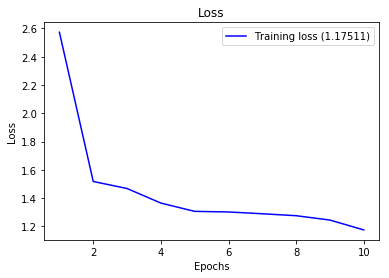

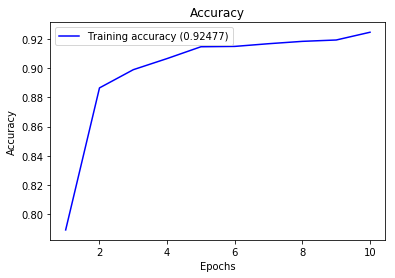

This is k-fold: 2
Epoch 1/10
4320/4320 [==============================] - 21s 5ms/step - loss: 2.2055 - acc: 0.8127
Epoch 2/10
4320/4320 [==============================] - 13s 3ms/step - loss: 1.4837 - acc: 0.8917
Epoch 3/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.4109 - acc: 0.8995
Epoch 4/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.4074 - acc: 0.9060
Epoch 5/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.3175 - acc: 0.9146
Epoch 6/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.2954 - acc: 0.9157
Epoch 7/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.2090 - acc: 0.9231
Epoch 8/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.2611 - acc: 0.9183
Epoch 9/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.2475 - acc: 0.9213
Epoch 10/10
1080/1080 [==============================] - 3s 3ms/step


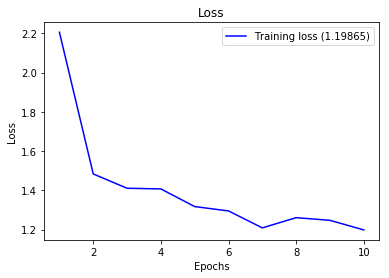

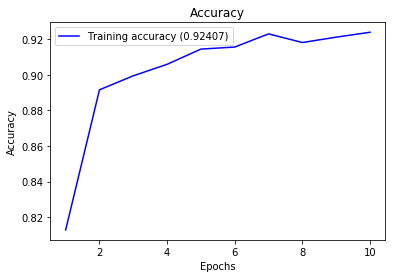

This is k-fold: 3
Epoch 1/10
4320/4320 [==============================] - 24s 6ms/step - loss: 2.0467 - acc: 0.8257
Epoch 2/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.6630 - acc: 0.8810
Epoch 3/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.4546 - acc: 0.8979
Epoch 4/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.3539 - acc: 0.9086
Epoch 5/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.3389 - acc: 0.9109
Epoch 6/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.2511 - acc: 0.9178
Epoch 7/10
4320/4320 [==============================] - 11s 3ms/step - loss: 1.2574 - acc: 0.9171
Epoch 8/10
4320/4320 [==============================] - 13s 3ms/step - loss: 1.2057 - acc: 0.9227
Epoch 9/10
4320/4320 [==============================] - 13s 3ms/step - loss: 1.1923 - acc: 0.9229
Epoch 10/10
1080/1080 [==============================] - 4s 3ms/step


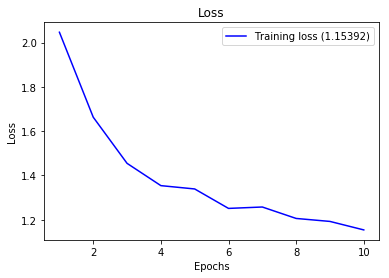

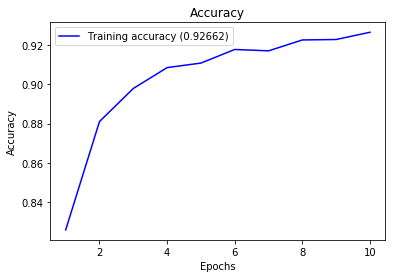

This is k-fold: 4
Epoch 1/10
4320/4320 [==============================] - 18s 4ms/step - loss: 1.7366 - acc: 0.8370
Epoch 2/10
4320/4320 [==============================] - 11s 3ms/step - loss: 0.7878 - acc: 0.9338
Epoch 3/10
4320/4320 [==============================] - 11s 3ms/step - loss: 0.6420 - acc: 0.9500
Epoch 4/10
4320/4320 [==============================] - 13s 3ms/step - loss: 0.5409 - acc: 0.9586
Epoch 5/10
4320/4320 [==============================] - 13s 3ms/step - loss: 0.5725 - acc: 0.9593
Epoch 6/10
4320/4320 [==============================] - 32s 7ms/step - loss: 0.4688 - acc: 0.9660
Epoch 7/10
4320/4320 [==============================] - 13s 3ms/step - loss: 0.4545 - acc: 0.9681
Epoch 8/10
4320/4320 [==============================] - 12s 3ms/step - loss: 0.4521 - acc: 0.9688
Epoch 9/10
4320/4320 [==============================] - 11s 2ms/step - loss: 0.3565 - acc: 0.9757
Epoch 10/10
1080/1080 [==============================] - 5s 4ms/step


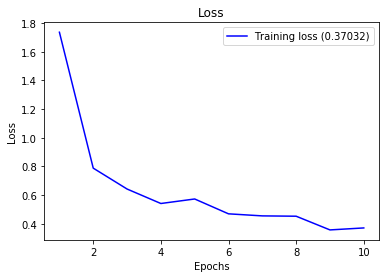

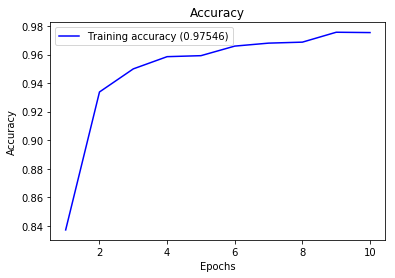

This is k-fold: 5
Epoch 1/10
4320/4320 [==============================] - 17s 4ms/step - loss: 2.1348 - acc: 0.8257
Epoch 2/10
4320/4320 [==============================] - 52s 12ms/step - loss: 1.4521 - acc: 0.8984
Epoch 3/10
4320/4320 [==============================] - 21s 5ms/step - loss: 1.3632 - acc: 0.9086
Epoch 4/10
4320/4320 [==============================] - 14s 3ms/step - loss: 1.3446 - acc: 0.9109
Epoch 5/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.2631 - acc: 0.9183
Epoch 6/10
4320/4320 [==============================] - 12s 3ms/step - loss: 1.2811 - acc: 0.9188
Epoch 7/10
4320/4320 [==============================] - 13s 3ms/step - loss: 1.2714 - acc: 0.9183
Epoch 8/10
4320/4320 [==============================] - 10s 2ms/step - loss: 1.2725 - acc: 0.9178
Epoch 9/10
4320/4320 [==============================] - 10s 2ms/step - loss: 1.3561 - acc: 0.9132
Epoch 10/10
1080/1080 [==============================] - 5s 4ms/step


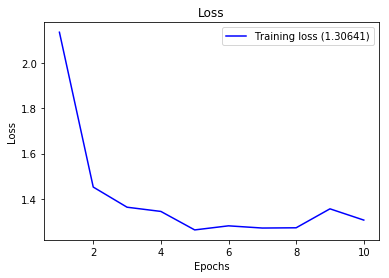

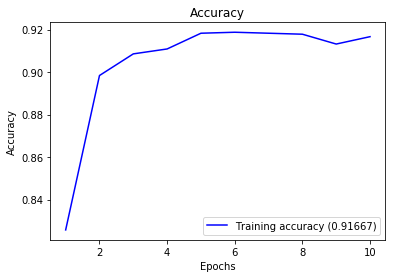

In [15]:
kerasacc_allmulti, kerasloss_allmulti = cs.deep_learning(all_type, 'Type', 5, True)

In [16]:
kerasacc_allmulti

0.9029629626980535

In [17]:
kerasloss_allmulti

1.460182705469261

The deep learning algorithms for all cancer type encodings outperform the classical machine learning algorithms in accuracy, as they resulted in a 90% accuracy across k-folds. Similarly, they had nicely inverse accuracy and loss learning curves that increased or decreased respectively across epochs. The only challenge with these deep learning algorithms is the significant mean loss of 1.46. 

This is k-fold: 1
Epoch 1/10
4320/4320 [==============================] - 4s 824us/step - loss: 0.7540 - acc: 0.8903
Epoch 2/10
4320/4320 [==============================] - 3s 724us/step - loss: 0.3689 - acc: 0.9502
Epoch 3/10
4320/4320 [==============================] - 3s 778us/step - loss: 0.2618 - acc: 0.9697
Epoch 4/10
4320/4320 [==============================] - 4s 864us/step - loss: 0.2207 - acc: 0.9729
Epoch 5/10
4320/4320 [==============================] - 4s 918us/step - loss: 0.1610 - acc: 0.9812
Epoch 6/10
4320/4320 [==============================] - 6s 1ms/step - loss: 0.1441 - acc: 0.9854
Epoch 7/10
4320/4320 [==============================] - 3s 696us/step - loss: 0.1498 - acc: 0.9845
Epoch 8/10
4320/4320 [==============================] - 4s 876us/step - loss: 0.1386 - acc: 0.9861
Epoch 9/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.1285 - acc: 0.9880
Epoch 10/10
1080/1080 [==============================] - 1s 729us/step


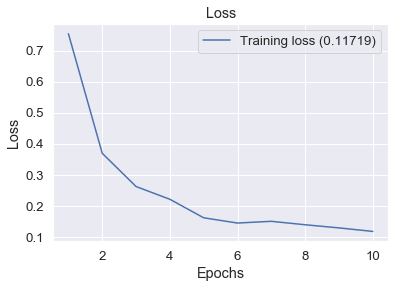

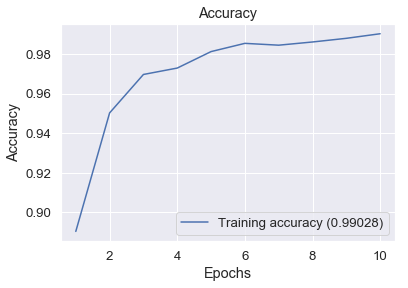

This is k-fold: 2
Epoch 1/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.7459 - acc: 0.8854
Epoch 2/10
4320/4320 [==============================] - 4s 998us/step - loss: 0.3847 - acc: 0.9549
Epoch 3/10
4320/4320 [==============================] - 4s 955us/step - loss: 0.2676 - acc: 0.9694
Epoch 4/10
4320/4320 [==============================] - 3s 746us/step - loss: 0.2375 - acc: 0.9745
Epoch 5/10
4320/4320 [==============================] - 3s 801us/step - loss: 0.1587 - acc: 0.9822
Epoch 6/10
4320/4320 [==============================] - 3s 785us/step - loss: 0.1447 - acc: 0.9843 0s - loss: 0.1270
Epoch 7/10
4320/4320 [==============================] - 4s 962us/step - loss: 0.1162 - acc: 0.9880
Epoch 8/10
4320/4320 [==============================] - 3s 780us/step - loss: 0.1220 - acc: 0.9884
Epoch 9/10
4320/4320 [==============================] - 3s 743us/step - loss: 0.1410 - acc: 0.9884
Epoch 10/10
1080/1080 [==============================] - 0s 438us/step


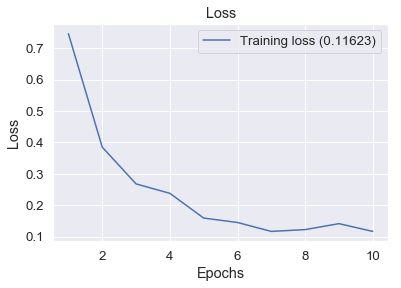

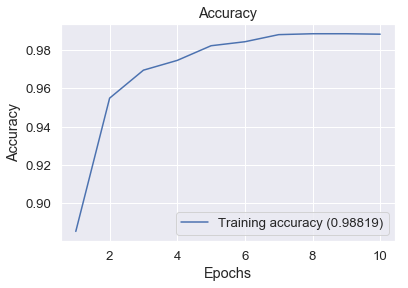

This is k-fold: 3
Epoch 1/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.7668 - acc: 0.8852A: 0s - loss: 0.7897 - ac
Epoch 2/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.4297 - acc: 0.9475
Epoch 3/10
4320/4320 [==============================] - 4s 1ms/step - loss: 0.3290 - acc: 0.9681
Epoch 4/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.2523 - acc: 0.9729
Epoch 5/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.1818 - acc: 0.9815
Epoch 6/10
4320/4320 [==============================] - 4s 967us/step - loss: 0.1904 - acc: 0.9796 1s - loss: 0
Epoch 7/10
4320/4320 [==============================] - 4s 875us/step - loss: 0.1553 - acc: 0.9852
Epoch 8/10
4320/4320 [==============================] - 5s 1ms/step - loss: 0.1578 - acc: 0.9870
Epoch 9/10
4320/4320 [==============================] - 3s 703us/step - loss: 0.1218 - acc: 0.9884
Epoch 10/10
1080/1080 [==============================] - 0s 440us

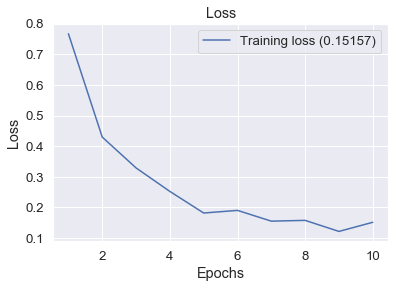

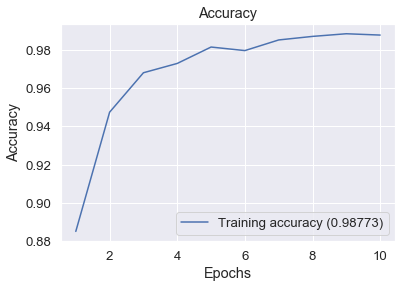

This is k-fold: 4
Epoch 1/10
4320/4320 [==============================] - 3s 798us/step - loss: 0.7870 - acc: 0.8863
Epoch 2/10
4320/4320 [==============================] - 3s 679us/step - loss: 0.3654 - acc: 0.9542
Epoch 3/10
4320/4320 [==============================] - 3s 687us/step - loss: 0.2336 - acc: 0.9690
Epoch 4/10
4320/4320 [==============================] - 3s 671us/step - loss: 0.1630 - acc: 0.9794
Epoch 5/10
4320/4320 [==============================] - 3s 670us/step - loss: 0.1709 - acc: 0.9796
Epoch 6/10
4320/4320 [==============================] - 3s 668us/step - loss: 0.1269 - acc: 0.9880
Epoch 7/10
4320/4320 [==============================] - 3s 674us/step - loss: 0.1354 - acc: 0.9875
Epoch 8/10
4320/4320 [==============================] - 3s 670us/step - loss: 0.0924 - acc: 0.9914
Epoch 9/10
4320/4320 [==============================] - 3s 676us/step - loss: 0.0985 - acc: 0.9896
Epoch 10/10
1080/1080 [==============================] - 0s 403us/step


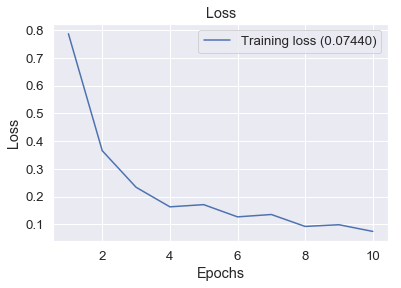

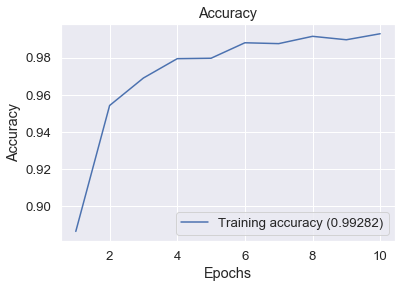

This is k-fold: 5
Epoch 1/10
4320/4320 [==============================] - 3s 796us/step - loss: 0.7938 - acc: 0.8854
Epoch 2/10
4320/4320 [==============================] - 3s 689us/step - loss: 0.3753 - acc: 0.9530
Epoch 3/10
4320/4320 [==============================] - 3s 694us/step - loss: 0.2273 - acc: 0.9725
Epoch 4/10
4320/4320 [==============================] - 3s 699us/step - loss: 0.1966 - acc: 0.9745
Epoch 5/10
4320/4320 [==============================] - 3s 685us/step - loss: 0.1478 - acc: 0.9829
Epoch 6/10
4320/4320 [==============================] - 3s 681us/step - loss: 0.1481 - acc: 0.9815
Epoch 7/10
4320/4320 [==============================] - 3s 687us/step - loss: 0.0938 - acc: 0.9896
Epoch 8/10
4320/4320 [==============================] - 3s 679us/step - loss: 0.0922 - acc: 0.9891
Epoch 9/10
4320/4320 [==============================] - 3s 688us/step - loss: 0.1038 - acc: 0.9903
Epoch 10/10
1080/1080 [==============================] - 0s 408us/step


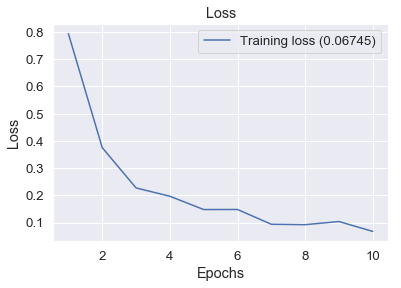

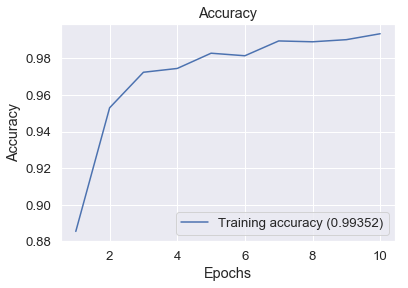

In [21]:
kerasacc_proteinmulti, kerasloss_proteinmulti = cs.deep_learning(protein_type, 'Type', 5, True)

In [22]:
kerasacc_proteinmulti

0.9614814813931783

In [23]:
kerasloss_proteinmulti

0.4143939355884977

The deep learning algorithms for the cancer type protein encodings outperformed classical machine learning methods significantly. The mean accuracy for these methods was 96%, and the learning curves corresponded to what they should look like. The mean loss was also lower than expected at 0.414.